<a href="https://colab.research.google.com/github/salmanbhatti87/CodeSoft/blob/main/simple_model_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

In [2]:
# Load the dataset from TensorFlow
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=dataset_url, extract=True)
dataset_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'validation')

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
import tensorflow as tf
import os

dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=dataset_url, extract=True)

dataset_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# Verify dataset structure
print("Dataset directory exists:", os.path.exists(dataset_dir))
print("Subdirectories:", os.listdir(dataset_dir) if os.path.exists(dataset_dir) else "Not found")

train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'validation')

print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(val_dir))


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Dataset directory exists: False
Subdirectories: Not found
Train directory exists: False
Validation directory exists: False


In [5]:
import os
import tensorflow as tf

# Get the default storage path for datasets
dataset_path = tf.keras.utils.get_file(
    'cats_and_dogs_filtered.zip',
    origin="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
)

print("Downloaded file path:", dataset_path)


Downloaded file path: /root/.keras/datasets/cats_and_dogs_filtered.zip


In [6]:
import zipfile
import os

# Path to the downloaded ZIP file
dataset_zip_path = "/root/.keras/datasets/cats_and_dogs_filtered.zip"

# Extract it in the same directory
extract_path = os.path.dirname(dataset_zip_path)

with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
extracted_dir = os.path.join(extract_path, "cats_and_dogs_filtered")
print("Dataset directory exists:", os.path.exists(extracted_dir))
print("Contents:", os.listdir(extracted_dir) if os.path.exists(extracted_dir) else "Extraction failed")


Dataset directory exists: True
Contents: ['train', 'vectorize.py', 'validation']


In [7]:
# Image data generator (without augmentation)
train_data = keras.preprocessing.image_dataset_from_directory(train_dir,
                                                              image_size=(128, 128),
                                                              batch_size=32)

val_data = keras.preprocessing.image_dataset_from_directory(val_dir,
                                                            image_size=(128, 128),
                                                            batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [8]:
# Normalize images (rescale pixel values between 0-1)
normalization_layer = layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))

In [9]:
# Define a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (Cats & Dogs)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [22]:
# Train the model
history = model.fit(train_data, epochs=30, validation_data=val_data)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9365 - loss: 0.1507 - val_accuracy: 0.7070 - val_loss: 1.0211
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9553 - loss: 0.1066 - val_accuracy: 0.7020 - val_loss: 1.1452
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9841 - loss: 0.0524 - val_accuracy: 0.7330 - val_loss: 1.1370
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9909 - loss: 0.0418 - val_accuracy: 0.7190 - val_loss: 1.2617
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9924 - loss: 0.0323 - val_accuracy: 0.7000 - val_loss: 1.4710
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9973 - loss: 0.0166 - val_accuracy: 0.7140 - val_loss: 1.5122
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.7180 - val_loss: 1.6636
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.7210 - v

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(val_data)
print(f"Test Accuracy: {test_acc:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7114 - loss: 2.3317
Test Accuracy: 0.72


In [24]:
# Save the model in H5 format
model.save("cats_dogs_classifier.h5")
print("Model saved as cats_dogs_classifier.h5")

Model saved as cats_dogs_classifier.h5


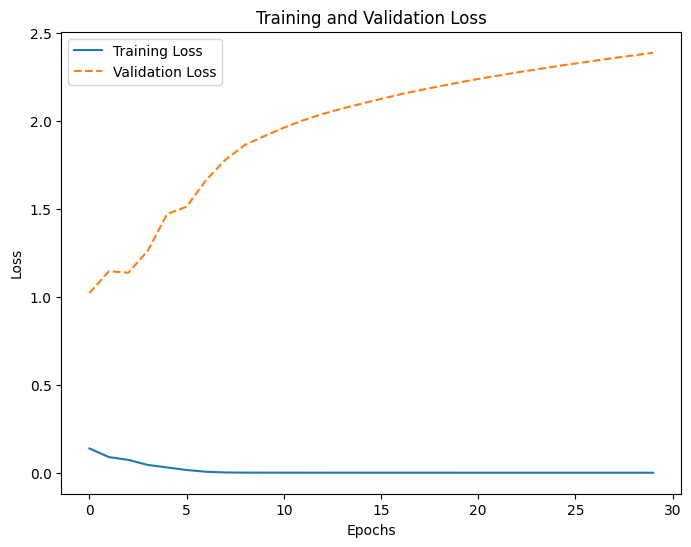

In [25]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [26]:
# Classification Metrics
y_true = []
y_pred = []

In [27]:
# Get predictions
for images, labels in val_data:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype(int).flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

In [28]:
# Classification report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))

Classification Report:
               precision    recall  f1-score   support

         Cat       0.73      0.71      0.72       500
         Dog       0.72      0.74      0.73       500

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



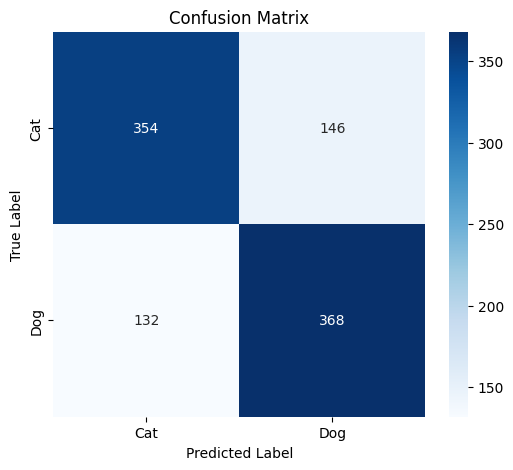

In [29]:
# Confusion Matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()